In [1]:
from google.colab import drive
 
 
drive.mount('noises/')
root_path = 'noises/My Drive/'  #change dir to your project folder

Mounted at noises/


In [2]:
%cd noises/MyDrive/

/content/noises/MyDrive


## Анализ данных. Предобработка данных

In [3]:
!pip install --user xgboost


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import LinearSVR

from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb

In [4]:
df

NameError: ignored

In [5]:
df_2019 = pd.read_csv('all_datas.csv')

In [6]:
df_2019 = df_2019.replace(' ', np.nan)

In [7]:
df_2019.info

<bound method DataFrame.info of                               Регион  ...  Социальная ориентированность бюджетов
0                     Алтайский край  ...                                 41.952
1                   Амурская область  ...                                 39.507
2              Архангельская область  ...                                 42.384
3               Астраханская область  ...                                 35.910
4               Белгородская область  ...                                 54.358
..                               ...  ...                                    ...
505       Чукотский автономный округ  ...                                 61.830
506  Ямало-Ненецкий автономный округ  ...                                 40.010
507              Ярославская область  ...                                 17.500
508                      Севастополь  ...                                 46.500
509                  Республика Крым  ...                                 42.

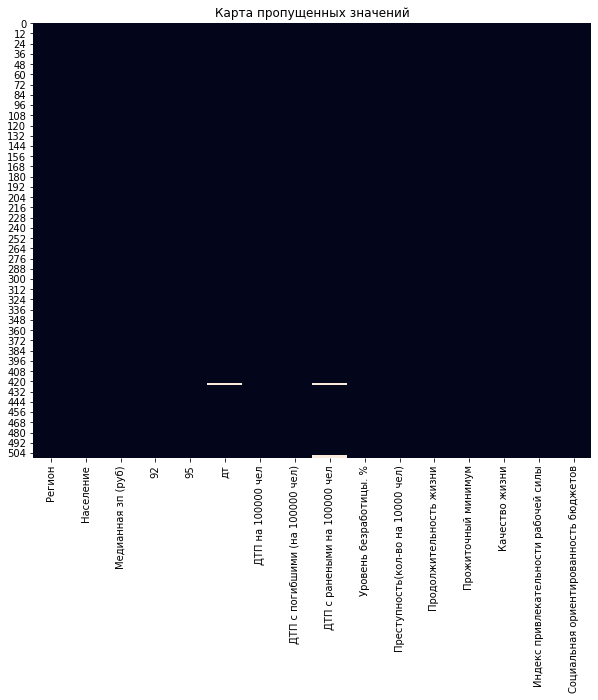


Количество пропусков в каждом столбце:


Регион                                   0
Население                                0
Медианная зп (руб)                       0
92                                       0
95                                       0
дт                                       2
ДТП на 100000 чел                        0
ДТП с погибшими (на 100000 чел)          0
ДТП с ранеными на 100000 чел             4
Уровень безработицы. %                   0
Преступность(кол-во на 10000 чел)        0
Продолжительность жизни                  0
Прожиточный минимум                      0
Качество жизни                           0
Индекс привлекательности рабочей силы    0
Социальная ориентированность бюджетов    0
dtype: int64

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_2019.isnull(), cbar=False).set_title('Карта пропущенных значений')
plt.show()

print("\nКоличество пропусков в каждом столбце:")
df_2019.isnull().sum()

In [9]:
df = df_2019.copy(deep = True).drop(['дт', 'ДТП с ранеными на 100000 чел'], axis=1)

Корелляционная матрица

In [10]:
'''visualizes the correlation matrix of features in the dataset'''
def corrmat(data):
    plt.figure(figsize=(10,10))
    sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}).set_title("Correlation Matrix")
    plt.show()

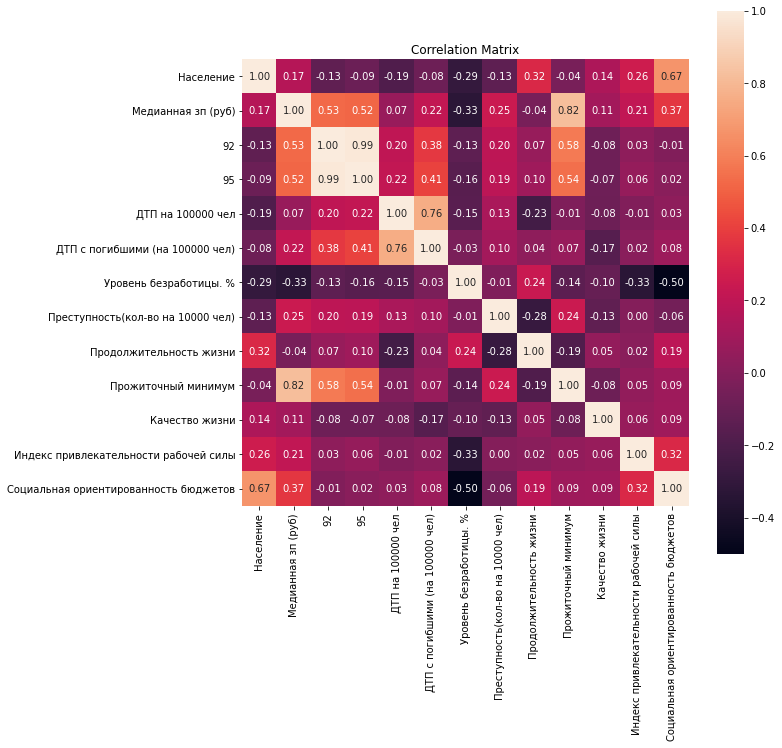

In [11]:
corrmat(df)

In [12]:
df['Преступность(кол-во на 10000 чел)'] /= 10

In [13]:
df.mean(), df.std(), df.max()

(Население                                1.751974e+06
 Медианная зп (руб)                       2.449115e+04
 92                                       3.957069e+01
 95                                       4.245631e+01
 ДТП на 100000 чел                        1.413939e+02
 ДТП с погибшими (на 100000 чел)          3.131157e+01
 Уровень безработицы. %                   6.216863e+00
 Преступность(кол-во на 10000 чел)        1.619982e+01
 Продолжительность жизни                  7.190455e+01
 Прожиточный минимум                      1.082653e+04
 Качество жизни                           4.334107e+01
 Индекс привлекательности рабочей силы    4.359249e+01
 Социальная ориентированность бюджетов    4.335083e+01
 dtype: float64, Население                                1.792657e+06
 Медианная зп (руб)                       1.025643e+04
 92                                       4.864222e+00
 95                                       4.882184e+00
 ДТП на 100000 чел                        5.33908

Ищем и удаляем выбросы

In [14]:
df[df['Преступность(кол-во на 10000 чел)']>1000]

,Регион,Население,Медианная зп (руб),92,95,ДТП на 100000 чел,ДТП с погибшими (на 100000 чел),Уровень безработицы. %,Преступность(кол-во на 10000 чел),Продолжительность жизни,Прожиточный минимум,Качество жизни,Индекс привлекательности рабочей силы,Социальная ориентированность бюджетов


In [15]:
df[df['Качество жизни']>100]

,Регион,Население,Медианная зп (руб),92,95,ДТП на 100000 чел,ДТП с погибшими (на 100000 чел),Уровень безработицы. %,Преступность(кол-во на 10000 чел),Продолжительность жизни,Прожиточный минимум,Качество жизни,Индекс привлекательности рабочей силы,Социальная ориентированность бюджетов
504,Чувашская Республика,3444025,21300.0,40.36,44.13,208.0,110.0,4.9,3.788590,72.08,10276.0,311.141476,45.96,49.70
506,Ямало-Ненецкий автономный округ,1208806,78200.0,42.95,46.22,250.0,98.0,4.5,6.312014,73.44,9285.0,522.388073,53.30,40.01


In [16]:
df = df.drop([504,506,484,490,507])

In [17]:
df

,Регион,Население,Медианная зп (руб),92,95,ДТП на 100000 чел,ДТП с погибшими (на 100000 чел),Уровень безработицы. %,Преступность(кол-во на 10000 чел),Продолжительность жизни,Прожиточный минимум,Качество жизни,Индекс привлекательности рабочей силы,Социальная ориентированность бюджетов
0,Алтайский край,2380793,16484.3,32.04,34.84,146.7,13.1,8.0,20.371000,70.44,8798.0,39.000000,44.69,41.952
1,Амурская область,807781,22087.9,37.33,39.44,173.1,18.8,5.8,24.047000,67.27,10740.0,38.510000,32.01,39.507
2,Архангельская область,1178701,24266.7,34.21,37.59,147.5,12.0,6.8,19.572000,70.70,12963.0,32.950000,37.22,42.384
3,Астраханская область,1019956,18337.5,34.30,37.25,152.1,13.4,7.5,14.466000,71.36,8452.0,43.310000,52.64,35.910
4,Белгородская область,1549037,21710.1,33.75,36.71,80.2,13.4,4.1,10.202000,72.61,8134.0,35.460000,50.72,54.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Челябинская область,1302918,58000.0,45.41,47.46,255.0,128.0,3.5,48.633910,70.05,14417.0,20.124150,52.19,45.210
503,Чеченская Республика,1688378,28400.0,44.18,46.98,122.0,86.0,2.3,1.859181,75.04,15376.0,8.849962,36.60,80.050
505,Чукотский автономный округ,1500490,22100.0,42.83,45.48,44.0,18.0,13.5,0.523829,75.88,10998.0,36.892457,27.72,61.830
508,Севастополь,513149,12600.0,45.53,50.74,281.0,122.0,3.6,11.895000,73.53,11538.0,54.250000,51.20,46.500


Нормирование по среднему

In [110]:
df.mean(), df.max()

(Население                                1.751974e+06
 Медианная зп (руб)                       2.449115e+04
 92                                       3.957069e+01
 95                                       4.245631e+01
 ДТП на 100000 чел                        1.413939e+02
 ДТП с погибшими (на 100000 чел)          3.131157e+01
 Уровень безработицы. %                   6.216863e+00
 Преступность(кол-во на 10000 чел)        1.619982e+01
 Продолжительность жизни                  7.190455e+01
 Прожиточный минимум                      1.082653e+04
 Качество жизни                           4.334107e+01
 Индекс привлекательности рабочей силы    4.359249e+01
 Социальная ориентированность бюджетов    4.335083e+01
 dtype: float64, Регион                                   Ярославская область
 Население                                           12646679
 Медианная зп (руб)                                     78200
 92                                                        60
 95                  

In [111]:
print( (df['Население']-np.min(df['Население']))/(np.max(df['Население'])-np.min(df['Население'])))

0      0.185446
1      0.060634
2      0.090065
3      0.077469
4      0.119450
         ...   
505    0.115598
506    0.092454
507    0.000452
508    0.037256
509    0.147591
Name: Население, Length: 510, dtype: float64


Метрики качества:

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [19]:
from sklearn.metrics import r2_score
def get_metrics(model_name, y_test,y_pred,type_metric):
    return ({
        'model_name': model_name,
        'MAE': metrics.mean_absolute_error(y_test, y_pred),
        "RMSE": metrics.mean_squared_error(y_test, y_pred),
        "R2":r2_score(y_test, y_pred)
    })

In [20]:
def get_determenate(model_name, y_test,y_pred):
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return 1 - (np.square(y_pred-y_true)/(y_true-np.mean(y_true)))

Обработка выбрасов


In [21]:
df[df['Качество жизни']<15]

,Регион,Население,Медианная зп (руб),92,95,ДТП на 100000 чел,ДТП с погибшими (на 100000 чел),Уровень безработицы. %,Преступность(кол-во на 10000 чел),Продолжительность жизни,Прожиточный минимум,Качество жизни,Индекс привлекательности рабочей силы,Социальная ориентированность бюджетов
57,Республика Тыва,314706,12330.4,35.50,38.05,165.3,38.1,18.6,26.895000,63.13,9804.00,12.630000,27.630,12.295
143,Республика Хакасия,537225,16008.4,31.65,34.65,139.2,16.9,6.3,20.589000,69.33,9158.00,12.530000,27.753,27.610
228,Республика Хакасия,537591,16437.5,36.75,38.51,116.3,18.0,4.9,21.441000,70.21,9289.00,13.960000,60.990,27.610
426,Амурская область,781850,37500.0,45.28,47.95,295.0,145.0,5.2,23.562060,68.66,12235.00,11.901029,39.960,44.350
435,Еврейская автономная область,156492,32700.0,45.91,47.98,298.0,130.0,6.3,23.598650,68.08,15344.38,11.966965,27.170,46.500
483,Республика Хакасия,330327,27600.0,41.94,44.78,632.0,202.0,11.8,32.812940,67.57,10778.00,11.256287,13.960,41.890
492,Ставропольский край,513149,24100.0,45.53,50.74,281.0,122.0,3.6,67.707430,73.53,11538.00,11.603930,46.280,55.050
493,Тамбовская область,921620,23400.0,43.62,46.91,240.0,99.0,4.9,14.380110,71.89,10810.00,7.668664,51.520,39.010
503,Чеченская Республика,1688378,28400.0,44.18,46.98,122.0,86.0,2.3,1.859181,75.04,15376.00,8.849962,36.600,80.050


In [22]:
df = df.drop([57,143,228], axis=0)

In [23]:
col = 'Качество жизни'
df[col].max(), df[col].mean(), df[col].std(), df[col].min()

(79.275, 42.22385549091034, 13.29158772797071, 7.668663671)

## Разделение данных на тренировочную выборку и тестовую выборку

In [62]:
df1 = df.loc[:84,:]
df1.to_csv('index_happy1.csv')

In [61]:
df2 = df.loc[509-84:,:]
df2.to_csv('index_happy2.csv')

## Обучение на моделях

In [24]:
def train_model(model, model_name, parameters,grid: True, x_train, y_train, x_test, y_test):
    if grid==True:
        grid_search = GridSearchCV(model, parameters, n_jobs=-1, scoring = 'neg_mean_squared_error')
        grid_search.fit(x_train, y_train)
        y_predict = grid_search.predict(x_test)
        print('The parameters combination {} that would give best accuracy is : '.format(model_name))
        print(grid_search.best_params_)
        #print(100 + grid_search.best_score_)
    else:
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        #print('{} predict: '.format(model), y_predict, 'test: ', y_test)
    #print(model_name, mean_absolute_percentage_error(y_test, y_predict))
    
    #print ("r2/variance : {}".format(model.score(y_predict,y_test)))
    return get_metrics(model_name,y_test,y_predict,model_name)

## 2 Вариант

In [30]:
from sklearn.linear_model import HuberRegressor
def train_models(X,y,X_test, y_test):
    lst_metrics=[]
        
    xgb_params = {
    'n_estimators': list(range(5,50)),
    'eval_metric':['mae', 'mse'], 
    'max_depth': list(range(3))
    
     }
    xgb_ = xgb.XGBRegressor()
    lst_metrics.append(train_model(xgb_, 'xgb', xgb_params,True, X,y,X_test, y_test))
    
    lin_reg = LinearRegression()
    lst_metrics.append(train_model(lin_reg, 'Linear Regression', xgb_params,False, X,y,X_test, y_test))
    
    ridge_parametrs = {
     'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'alpha': [0.001, 0.1, 0.02, 0.05, 0.5, 0.8, 1],
    }
    clf = Ridge()
    lst_metrics.append(train_model(clf, 'Ridge', ridge_parametrs, True, X,y,X_test, y_test))
    
    
    svr = LinearSVR()
    svm_parametrs = {
    'C' : np.arange(1, 80, 5), #параметр c
    'max_iter': np.arange(15, 150,10),
    }
    lst_metrics.append(train_model(svr, 'SVM', svm_parametrs, True, X,y,X_test, y_test))
    
    voting = VotingRegressor(estimators = [('lr',lin_reg), ('svm',svr), ('huber',HuberRegressor())])
    voting_parametrs = {
    }
    lst_metrics.append(train_model(voting, 'voiting', voting_parametrs, False, X,y,X_test, y_test))
    return lst_metrics

In [26]:
ridge_parametrs = {
     'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'alpha': [0.001, 0.1, 0.02, 0.05, 0.5, 0.8, 1],
    }
clf = Ridge()
model = train_model(clf, 'Ridge', ridge_parametrs, True, X,y,X_test, y_test)

NameError: ignored

In [27]:
from sklearn import preprocessing
def scores(df, del_columns, type_normilize):
    print('Удаленные столбцы:', del_columns)
    drop_list = ['Регион','Качество жизни']
    target = 'Качество жизни'
    df = df.copy(deep = True).drop(del_columns, axis=1)
    x_train,x_test,y_train,y_test = train_test_split(df.drop(drop_list,axis = 1),
                                                 df[target]/100,
                                                 random_state = 22,
                                                 test_size = 0.25)
    if type_normilize == 'mean':
      x_train_scaled = (x_train-np.mean(x_train))/np.sqrt(np.std(x_train))
      y_train_scaled = (y_train-np.mean(y_train))/np.sqrt(np.std(y_train))
      x_test_scaled = (x_test-np.mean(x_test))/np.sqrt(np.std(x_test))
      y_test_scaled = (y_test-np.mean(y_test))/np.sqrt(np.std(y_test))
    if type_normilize == 'min_max':
      x_train_scaled = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
      y_train_scaled = (y_train-np.min(y_train))/(np.max(y_train)-np.min(y_train))
      x_test_scaled = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))
      y_test_scaled = (y_test-np.min(y_test))/(np.max(y_test)-np.min(y_test))
    if type_normilize == 'StandartScaler':
      scaler = StandardScaler()
      scaler.fit(x_train)
      x_train_scaled = scaler.transform(x_train)
      x_test_scaled = scaler.transform(x_test)
      y_train_scaled = y_train/np.max(y_train)
      y_test_scaled = y_test/np.max(y_test)
    return train_models(x_train_scaled,y_train, x_test_scaled, y_test)

df1 = df.copy(deep = True).drop(['95',
              'ДТП с погибшими (на 100000 чел)', 'Прожиточный минимум'
              ], axis = 1)
#Медианная зп (руб), ДТП на 100000 чел, 92

In [122]:
np.std(df)


Население                                1.793417e+06
Медианная зп (руб)                       1.024913e+04
92                                       4.856029e+00
95                                       4.872323e+00
ДТП на 100000 чел                        5.347377e+01
ДТП с погибшими (на 100000 чел)          3.886501e+01
Уровень безработицы. %                   3.524114e+00
Преступность(кол-во на 10000 чел)        1.662199e+01
Продолжительность жизни                  2.465986e+00
Прожиточный минимум                      2.698118e+03
Качество жизни                           2.785817e+01
Индекс привлекательности рабочей силы    1.197127e+01
Социальная ориентированность бюджетов    1.511566e+01
dtype: float64

In [31]:
lst_drops = ['95', 'Прожиточный минимум']

In [32]:
df_metrics = pd.DataFrame(scores(df, lst_drops, 'StandartScaler'), columns=['model_name', 'MAE', 'RMSE', 'R2'])
df_metrics

Удаленные столбцы: ['95', 'Прожиточный минимум']
[23:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The parameters combination xgb that would give best accuracy is : 
{'eval_metric': 'mae', 'max_depth': 2, 'n_estimators': 44}
The parameters combination Ridge that would give best accuracy is : 
{'alpha': 0.8, 'solver': 'sag'}
The parameters combination SVM that would give best accuracy is : 
{'C': 1, 'max_iter': 145}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_name,MAE,RMSE,R2
0,xgb,0.075435,0.011037,0.332647
1,Linear Regression,0.077265,0.010226,0.381667
2,Ridge,0.077232,0.010221,0.382027
3,SVM,0.087164,0.013292,0.196304
4,voiting,0.077445,0.011022,0.333545


In [33]:
lst_drops = ['95','Медианная зп (руб)']
df_metrics = pd.DataFrame(scores(df, lst_drops,'min_max'), columns=['model_name', 'MAE', 'RMSE','R2'])
df_metrics

Удаленные столбцы: ['95', 'Медианная зп (руб)']
[23:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The parameters combination xgb that would give best accuracy is : 
{'eval_metric': 'mae', 'max_depth': 2, 'n_estimators': 40}
The parameters combination Ridge that would give best accuracy is : 
{'alpha': 0.5, 'solver': 'lsqr'}
The parameters combination SVM that would give best accuracy is : 
{'C': 1, 'max_iter': 145}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_name,MAE,RMSE,R2
0,xgb,0.079910,0.011733,0.290596
1,Linear Regression,0.077678,0.010454,0.367938
2,Ridge,0.077504,0.010301,0.377132
3,SVM,0.085490,0.013970,0.155306
4,voiting,0.078630,0.011383,0.311744


In [34]:
lst_drops = ['92', 'Прожиточный минимум']
df_metrics = pd.DataFrame(scores(df, lst_drops, 'min_max'), columns=['model_name', 'MAE', 'RMSE','R2'])
df_metrics

Удаленные столбцы: ['92', 'Прожиточный минимум']
[23:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The parameters combination xgb that would give best accuracy is : 
{'eval_metric': 'mae', 'max_depth': 2, 'n_estimators': 48}
The parameters combination Ridge that would give best accuracy is : 
{'alpha': 0.8, 'solver': 'lsqr'}
The parameters combination SVM that would give best accuracy is : 
{'C': 1, 'max_iter': 75}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_name,MAE,RMSE,R2
0,xgb,0.081914,0.011982,0.275531
1,Linear Regression,0.077335,0.010222,0.381918
2,Ridge,0.077167,0.010106,0.388931
3,SVM,0.078165,0.011999,0.274465
4,voiting,0.078961,0.011376,0.312178


In [35]:
rlst_drops = ['95']
df_metrics = pd.DataFrame(scores(df, rlst_drops,'StandartScaler'), columns=['model_name', 'MAE', 'RMSE','R2'])
df_metrics

Удаленные столбцы: ['95']
[23:02:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The parameters combination xgb that would give best accuracy is : 
{'eval_metric': 'mae', 'max_depth': 2, 'n_estimators': 44}
The parameters combination Ridge that would give best accuracy is : 
{'alpha': 1, 'solver': 'lsqr'}
The parameters combination SVM that would give best accuracy is : 
{'C': 1, 'max_iter': 145}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_name,MAE,RMSE,R2
0,xgb,0.075492,0.011060,0.331273
1,Linear Regression,0.077372,0.010278,0.378561
2,Ridge,0.077191,0.010239,0.380928
3,SVM,0.090252,0.014186,0.142252
4,voiting,0.077528,0.011123,0.327438


Для предсказаний выбрана модель Ridge

In [39]:
lst_drops = ['95']
drop_list = ['Регион','Качество жизни']

target = 'Качество жизни'
df1 = df.copy(deep = True).drop(lst_drops, axis=1)
x_train,x_test,y_train,y_test = train_test_split(df1.drop(drop_list,axis = 1),
                                                 df1[target]/100,
                                                 random_state = 22,
                                                 test_size = 0.25)

In [40]:
x_train_scaled = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
x_test_scaled = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))

In [45]:
import xgboost as xgb
xgb_params = {
    'n_estimators': list(range(5,50)),
    'eval_metric':['mae', 'mse'], 
    'max_depth': list(range(3))
    
     }
xgb_ = xgb.XGBRegressor(eval_metric= 'mae', max_depth= 2, n_estimators = 44)
xgb1 = train_model(clf, 'xgb', xgb_params, True, x_train_scaled,y_train,x_test_scaled, y_test)

ValueError: ignored

In [46]:
xgb_ = xgb.XGBRegressor(eval_metric= 'mae', max_depth= 2, n_estimators = 44)

In [47]:
xgb_.fit(x_train_scaled,y_train)

[23:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=44,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
xgb_.predict(x_test_scaled)

array([0.48817292, 0.44548997, 0.46280062, 0.35463697, 0.451094  ,
       0.24013174, 0.4565998 , 0.4206507 , 0.5583633 , 0.2336267 ,
       0.49095577, 0.5087302 , 0.30887195, 0.451094  , 0.5015075 ,
       0.53081596, 0.46915007, 0.440118  , 0.47615063, 0.48290655,
       0.42630228, 0.50100064, 0.5420093 , 0.23659927, 0.48738596,
       0.53619814, 0.52254194, 0.2916466 , 0.47285712, 0.53757185,
       0.30083764, 0.3708406 , 0.2751346 , 0.3861663 , 0.5500973 ,
       0.38944072, 0.459769  , 0.24128217, 0.48551458, 0.46962515,
       0.46613705, 0.41172343, 0.46915007, 0.24117398, 0.47212264,
       0.4242347 , 0.23303738, 0.348141  , 0.55852515, 0.33385924,
       0.5074593 , 0.48817292, 0.53619814, 0.3881477 , 0.25438038,
       0.44839618, 0.48551458, 0.5353031 , 0.4100074 , 0.44186914,
       0.3534209 , 0.5139322 , 0.48181084, 0.49366802, 0.5163027 ,
       0.5088143 , 0.4687056 , 0.26249093, 0.23929709, 0.5808227 ,
       0.46046665, 0.4562873 , 0.5944409 , 0.5602402 , 0.23847

In [51]:
from sklearn.externals import joblib
import pickle
with open('finalized_model.pklz', 'wb') as file:
    pickle.dump(xgb_, file)

In [135]:
import pandas as pd
import pickle
from sklearn.externals import joblib
def predict_model(filename):
  lst_drops = ['92', 'Прожиточный минимум']
  drop_list = ['Регион','Качество жизни']
  target = 'Качество жизни'
  df1 = df.copy(deep = True).drop(lst_drops, axis=1)
  df1 = df1.copy(deep = True).drop(drop_list, axis = 1)
  x_test_scaled = (x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test))
  loaded_model = pickle.load(open('finalized_model.pklz', 'rb'))
  result = loaded_model.predict(x_test_scaled)
  return result

In [136]:
str_ = 'all_data.csv'
predict_model(str_)

array([0.34961131, 0.3913471 , 0.2577151 , 0.41835687, 0.47896231,
       0.41517461, 0.50643026, 0.43576701, 0.51615785, 0.4963785 ,
       0.50674731, 0.52697524, 0.44710627, 0.47010687, 0.46076934,
       0.40087698, 0.55526871, 0.49388408, 0.49078596, 0.48513974,
       0.70376147, 0.32540207, 0.43962447, 0.38395163, 0.47535251,
       0.45139754, 0.48323722, 0.59493585, 0.35438853, 0.48698159,
       0.39638172, 0.498335  , 0.44990698, 0.74725202, 0.56007804,
       0.39727747, 0.4846605 , 0.42089943, 0.63789239, 0.4543943 ,
       0.46168859, 0.44209372, 0.48244463, 0.44966433, 0.56612468,
       0.48407757, 0.47457053, 0.40655186, 0.46699151, 0.45485109,
       0.48261728, 0.41107654, 0.46055451, 0.46969396, 0.47803745,
       0.44622819, 0.43736962, 0.37509907, 0.50093398, 0.51254386,
       0.39076643, 0.49942467, 0.3969828 , 0.51894117, 0.45056276,
       0.48553914, 0.47200961, 0.35906535, 0.59255627, 0.47708639,
       0.4816639 , 0.72475981, 0.4013894 , 0.49416811, 0.47708

In [38]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)

# create train and test indices
train, test = train_test_split(list(range(X.shape[0])), test_size=.3)

input_size = 10
hidden_layer_size = 2
learning_rate = 1e-5
batch_size = 10
num_epochs = 100

class PrepareData(Dataset):

    def __init__(self, X, y, scale_X=True):
        if not torch.is_tensor(X):
            if scale_X:
                X = StandardScaler().fit_transform(X)
                self.X = torch.from_numpy(X)
        if not torch.is_tensor(y):
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

ds = PrepareData(X, y=y, scale_X=True)

train_set = DataLoader(ds, batch_size=batch_size,
                       sampler=SubsetRandomSampler(train))
test_set = DataLoader(ds, batch_size=batch_size,
                      sampler=SubsetRandomSampler(test))

class RegressionModel(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(RegressionModel, self).__init__()
        self.dense_h1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu_h1 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.dense_out = nn.Linear(in_features=hidden_size, out_features=1)

    def forward(self, X):

        out = self.relu_h1(self.dense_h1(X))
        out = self.dropout(out)
        out = self.dense_out(out)

        return out

m = RegressionModel(input_size=input_size, hidden_size=hidden_layer_size)

cost_func = nn.MSELoss()
optimizer = torch.optim.Adam(m.parameters(), lr=learning_rate)

all_losses = []
for e in range(num_epochs):
    batch_losses = []

    for ix, (Xb, yb) in enumerate(train_set):

        _X = Variable(Xb).float()
        _y = Variable(yb).float()

        #==========Forward pass===============

        preds = m(_X)
        loss = cost_func(preds, _y)

        #==========backward pass==============

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.data[0])
        all_losses.append(loss.data[0])

    mbl = np.mean(np.sqrt(batch_losses)).round(3)

    if e % 5 == 0:
        print("Epoch [{}/{}], Batch loss: {}".format(e, num_epochs, mbl))

# prepares model for inference when trained with a dropout layer
print(m.training)
m.eval()
print(m.training)

test_batch_losses = []
for _X, _y in test_set:

    _X = Variable(_X).float()
    _y = Variable(_y).float()

    #apply model
    test_preds = m(_X)
    test_loss = cost_func(test_preds, _y)

    test_batch_losses.append(test_loss.data[0])
    print("Batch loss: {}".format(test_loss.data[0]))

RuntimeError: ignored

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

def train(data):
    drop_list = ['Регион','Качество жизни']
    target = 'Качество жизни'
    df = df.copy(deep = True).drop(['95','Медианная зп (руб)'], axis=1)
    x_train,x_test,y_train,y_test = train_test_split(df.drop(drop_list,axis = 1),
                                                 df[target]/100,
                                                 random_state = 22,
                                                 test_size = 0.25)
    num_trans = StandardScaler()
    best_model = Ridge(alpha= 0.5, solver= 'sparse_cg')
    preprocessor = ColumnTransformer(transformers = [('num', num_trans)])
    clf_pipe = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', clf_logress_pipe)])
    clf_pipe.fit(data)
    print ("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))
    return best_model

def get_predict(data):
    sc = StandardScaler()
    X_test = data.copy(deep = True).drop('Регион', axis=1)
    sc.fit(X_test)
    return best_model.predict_proba(X_test)[:, 1]



In [40]:
def get_predict(data):
    
    sc = StandardScaler()
    sc.fit(data)
    return best_model.predict_proba(X_test)[:, 1]


    
    

In [41]:
lst = df['Регион'].unique()
f = open('query.txt','w')
for k,i in enumerate(lst):
  f.write("insert into regions (id_regions, name) values ({},'{}');\n".format(k,i))
f.close()

In [42]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)